In [ ]:
!pip install yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
%matplotlib inline

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
bbas3 = yf.Ticker("BBAS3.SA")
info = pd.DataFrame([bbas3.info])
info

,address1,address2,city,state,country,phone,website,industry,industryDisp,sector,...,returnOnEquity,grossProfits,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio
0,EdifIcio Banco do Brasil,"Quadra 5, Lote B Setor de Autarquias Norte Fed...",Brasília,DF,Brazil,55 80 0729 5285,https://www.bb.com.br,Banks—Regional,Banks—Regional,Financial Services,...,0.22474,89250526000,-43518390272,0.086,0.091,0.0,0.0,0.4145,BRL,None


In [ ]:
history = bbas3.history(start="2023-01-01", end="2023-07-31", interval="1mo", rounding="2").reset_index()
history

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-01-01 00:00:00-03:00,32.07,38.88,30.39,38.15,346547900,0.00,0.0
1,2023-02-01 00:00:00-03:00,38.19,40.42,36.05,37.77,337166000,0.83,0.0
2,2023-03-01 00:00:00-03:00,38.53,38.60,35.09,37.39,289371200,0.35,0.0
3,2023-04-01 00:00:00-03:00,37.83,42.50,36.87,41.36,251540400,0.00,0.0
4,2023-05-01 00:00:00-03:00,41.36,43.81,40.08,43.06,273137100,0.00,0.0
5,2023-06-01 00:00:00-03:00,43.22,50.17,42.60,47.67,261211000,0.99,0.0
6,2023-07-01 00:00:00-03:00,48.87,49.79,46.00,47.52,202520800,0.00,0.0


In [ ]:
bbas3.actions # .dividends, splits

,Dividends,Stock Splits
Date,,
2023-02-01 00:00:00-03:00,0.83,0.0
2023-03-01 00:00:00-03:00,0.35,0.0
2023-06-01 00:00:00-03:00,0.99,0.0


In [ ]:
bbas3.dividends

Date
2023-02-01 00:00:00-03:00    0.83
2023-03-01 00:00:00-03:00    0.35
2023-06-01 00:00:00-03:00    0.99
Name: Dividends, dtype: float64

In [ ]:
bbas3.splits

Series([], Name: Stock Splits, dtype: float64)

In [ ]:
bbas3.major_holders

,0,1
0,50.00%,% of Shares Held by All Insider
1,20.74%,% of Shares Held by Institutions
2,41.47%,% of Float Held by Institutions
3,489,Number of Institutions Holding Shares


In [ ]:
bbas3.institutional_holders

In [ ]:
bbas3.isin

'-'

In [ ]:
bbas3.options

()

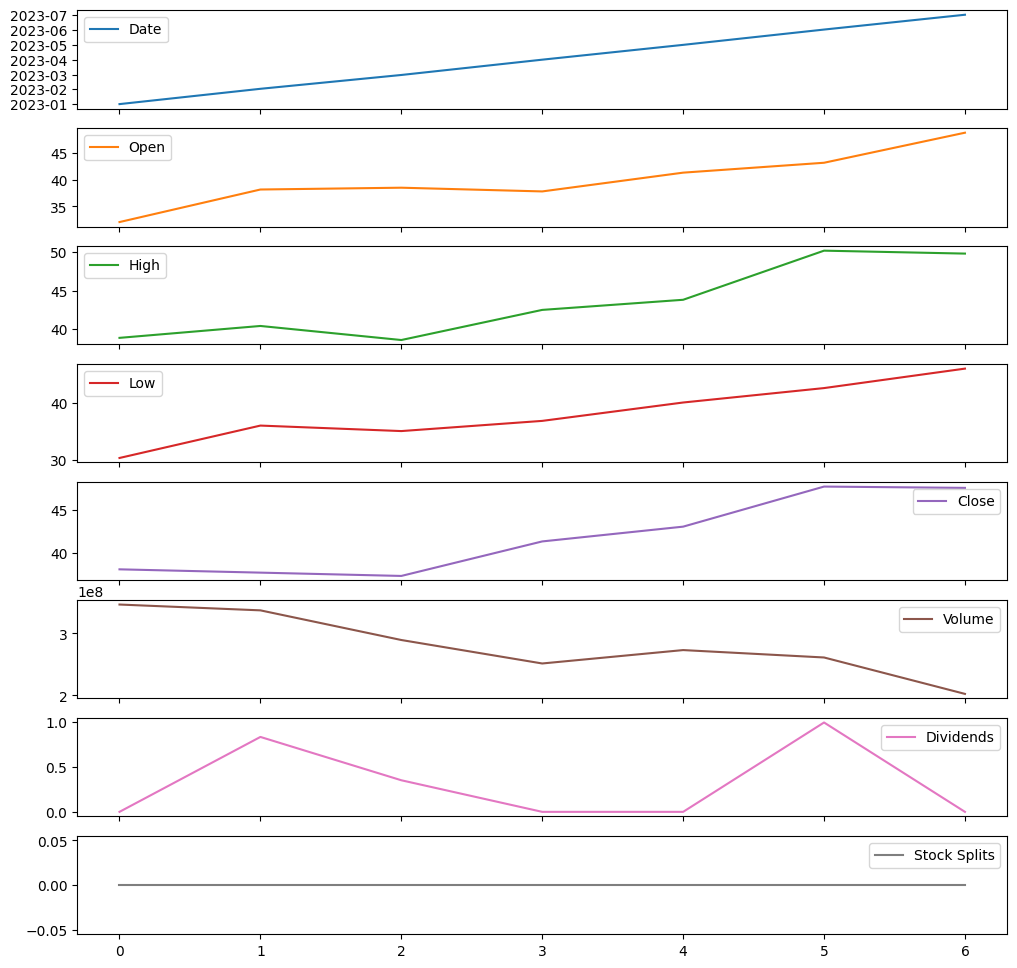

In [ ]:
history.plot(kind="line", figsize=(12, 12), subplots=True);

In [ ]:
indices = pd.read_html("https://finance.yahoo.com/quote/%5EGSPC?p=%5EGSPC")[0]


ValueError: No tables found

In [ ]:
indices

NameError: name 'indices' is not defined

In [ ]:
world_indices = pd.read_html("https://finance.yahoo.com/world-indices")[0]
world_indices.head(10)

ValueError: No tables found

In [ ]:
ticker_list = world_indices['Symbol'].str.replace("","").str.lower().to_list()
ticker_list

In [ ]:
len(ticker_list)

In [ ]:
df = yf.download(ticker_list, period="5y")
df

In [ ]:
df.columns

In [ ]:
adj_close = df.dropna(thresh=10, axis=1)["Adj Close"]

In [ ]:
adj_close.head(10)

In [ ]:
adj_close.describe().T

In [ ]:
adj_close.plot(figsize=(12, 12), subplots=True);

In [ ]:
adj_close.plot(figsize=(12, 20), subplots=True);

In [ ]:
dji = adj_close['^DJI']

In [ ]:
dji.resample("4m").mean()

In [ ]:
dji.shift(1)

In [ ]:
dji_per_change = dji / (dji.shift(1) - 1)

In [ ]:
dji_per_change.plot(figsize=(12, 12), subplots=True);

In [ ]:
dji_log_returns_shift = np.log(dji / dji.shift(1))

In [ ]:
dji_log_returns_shift.plot(figsize=(12, 12), subplots=True);

In [ ]:
dji.hist(bins=50, figsize=(12, 12));

In [ ]:
dji_log_returns_shift.hist(bins=50, figsize=(12, 12));

In [ ]:
dji_per_change.hist(bins=50, figsize=(12, 12));

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=62b79c8d-4c82-4fca-bcc5-1ba9c40c2b65' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>